In [2]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 3.4 MB/s eta 0:00:45
   ---------------------------------------- 1.6/150.0 MB 3.5 MB/s eta 0:00:43
    --------------------------------------- 2.1/150.0 MB 3.4 MB/s eta 0:00:45
    --------------------------------------- 2.9/150.0 MB 3.3 MB/s eta 0:00:45
    --------------------------------------- 3.4/150.0 MB 3.2 MB/s eta 0:00:46
   - -------------------------------------- 4.2/150.0 MB 3.3 MB/s eta 0:00:45
   - -------------------------------------- 4.7/150.0 MB 3.2 MB/s eta 0:00:46
   - -------------------------------------- 5.2/150.0 MB 3.2 MB/s eta 0:00:46
   - -------------------------------------- 6.0/150.0 MB 3.1 MB/s eta 0:00:47
   - -------------------------------------- 6.8/150.0 MB 3.2 MB/s eta 0:00:45
   - -------------------------------------- 7.3/150.0 MB 3.2 MB/s eta 0:00:45
   -- ------------------------------------- 8.1/150.0 MB 3.2 MB/s eta 0

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [16]:
house_price=fetch_california_housing()

In [17]:
print(house_price)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [21]:
house_price_dataframe=pd.DataFrame(house_price.data,columns=house_price.feature_names)
print(house_price_dataframe.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [22]:
house_price_dataframe['price']=house_price.target

In [23]:
house_price_dataframe.head

<bound method NDFrame.head of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Lo

In [24]:
house_price_dataframe.shape

(20640, 9)

In [25]:
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [26]:
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


#CORRELATION



<Axes: >

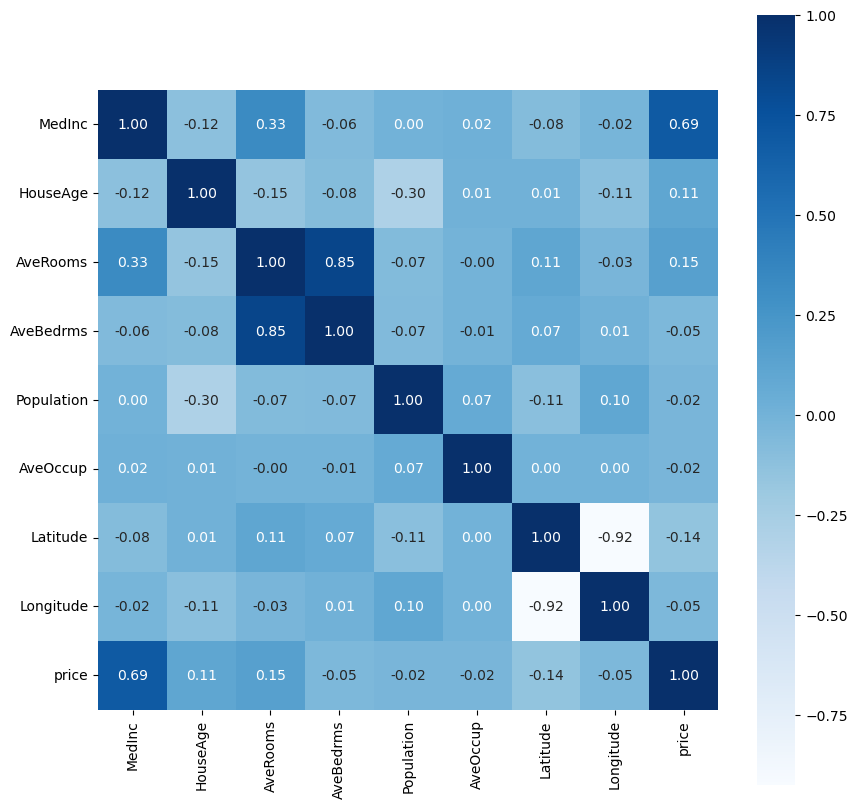

In [36]:
#Heatmap
correlation=house_price_dataframe.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':10},cmap='Blues')


In [39]:
X=house_price_dataframe.drop(columns=['price'],axis=1)
Y=house_price_dataframe['price']
print(X.head)

<bound method NDFrame.head of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Lo

In [40]:
print(Y.head())

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: price, dtype: float64


In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [44]:
model=XGBRegressor()
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [46]:
X_train_prediction=model.predict(X_train)
print(X_train_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [48]:
#R-Squared
scoreA=metrics.r2_score(Y_train,X_train_prediction)

#MEAN ABSOLUTE ERROR
scoreB=metrics.mean_absolute_error(Y_train,X_train_prediction)

In [49]:
print(scoreA)
print(scoreB)

0.943650140819218
0.1933648700612105


In [51]:
#evaluation on testing data
X_test_prediction=model.predict(X_test)
#R-Squared
scoreC=metrics.r2_score(Y_test,X_test_prediction)

#MEAN ABSOLUTE ERROR
scoreD=metrics.mean_absolute_error(Y_test,X_test_prediction)
print(scoreC)
print(scoreD)

0.8338000331788725
0.3108631800268186


C:\Users\AVISH VIJAY SHETTY\AppData\Local\Temp\ipykernel_20832\1769224297.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(Y_train, X_train_prediction, cmap='coolwarm', edgecolor='k')


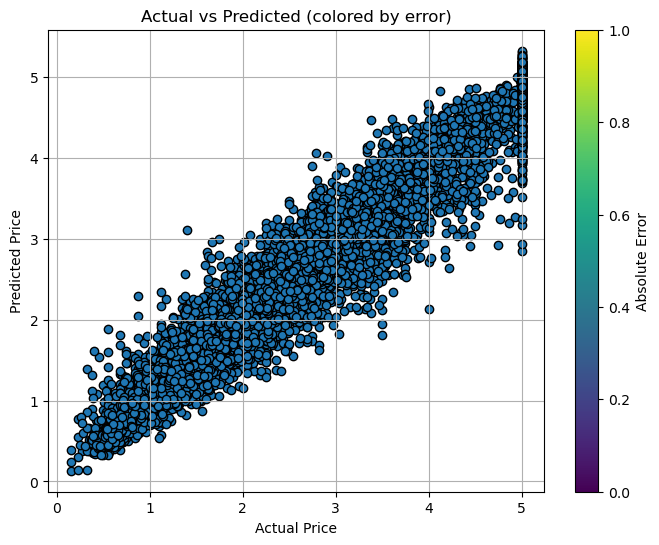

In [57]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(Y_train, X_train_prediction, cmap='coolwarm', edgecolor='k')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted (colored by error)')
plt.colorbar(scatter, label='Absolute Error')
plt.grid(True)
plt.show()